# AIM: Beer Sales Forecasting using Time-Series Modeling

Dataset: Beer sales data (1992-2018)

This project focuses on time-series forecasting of beer sales using the SARIMA (Seasonal ARIMA) model.
The objective is to analyze historical sales trends and predict demand for 2019 & 2020, helping businesses optimize inventory
management and supply chain planning.

* The general process for ARIMA models is the following:

- Visualize the Time Series Data
- Make the time series data stationary
- Plot the Correlation and AutoCorrelation Charts
- Construct the ARIMA Model or Seasonal ARIMA based on the data
- Use the model to make predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv((r"F:\Downloads\BeerWineLiquor.csv"))

In [4]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [5]:
df.tail()

,date,beer
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130
323,12/1/2018,6370


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [7]:
df

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
...,...,...
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130


- Convert date column to datetime and set as index

In [8]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

- Plot original beer sales data

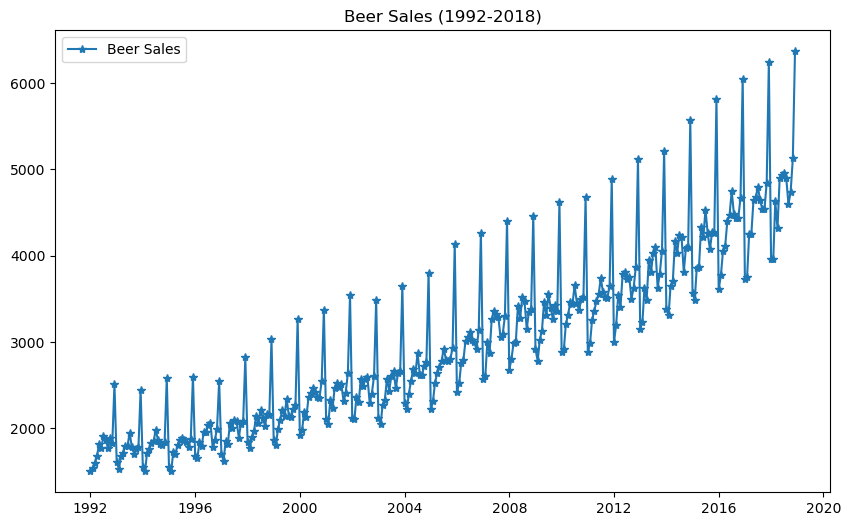

In [9]:
plt.figure(figsize=(10,6))
plt.plot(df['beer'], marker="*", label="Beer Sales")
plt.title("Beer Sales (1992-2018)")
plt.legend()
plt.show()

- UP trend
- seasonal pattern

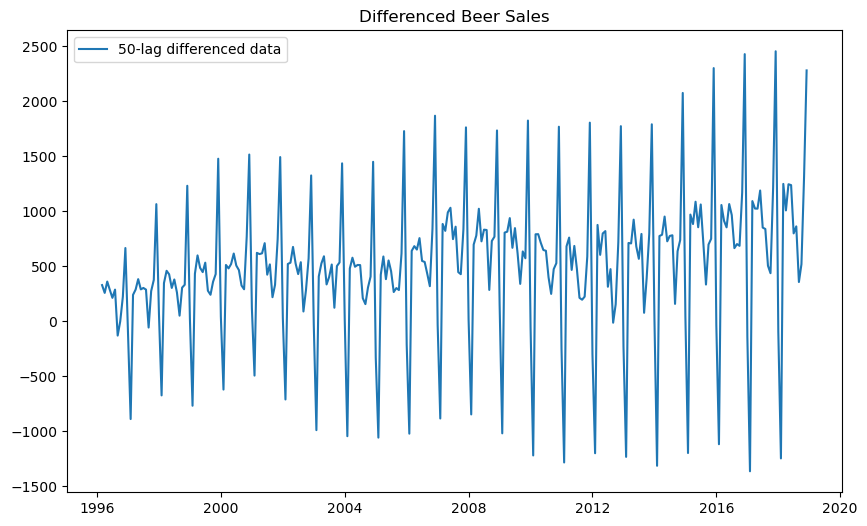

In [10]:
# Check stationarity using differencing
plt.figure(figsize=(10,6))
plt.plot(df['beer'].diff(50), label="50-lag differenced data")
plt.title("Differenced Beer Sales")
plt.legend()
plt.show()

In [11]:
# Log transformation for variance stabilization
df_log = np.log(df['beer'])

- ACF and PACF plots to determine AR & MA terms

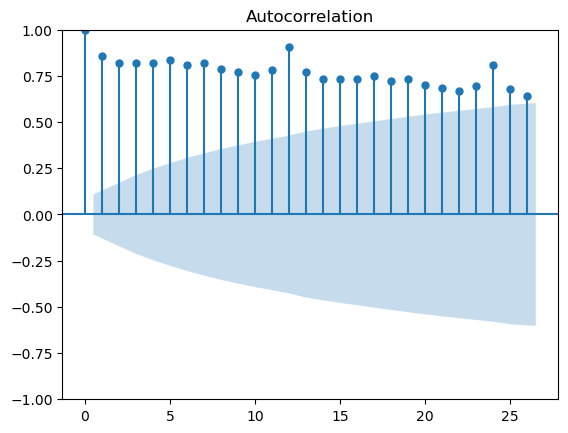

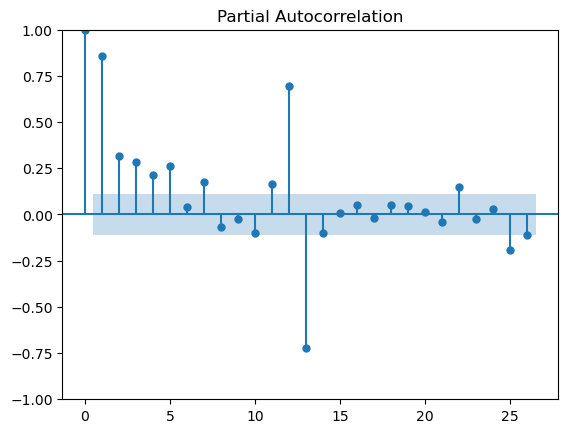

In [12]:
plot_acf(df_log)
plt.show()

plot_pacf(df_log)
plt.show()

In [13]:
# Auto-ARIMA to suggest best SARIMA parameters
auto_arima(df_log, seasonal=True , m= 12)

ARIMA(order=(3, 0, 0), scoring_args={}, seasonal_order=(0, 1, 2, 12),
      suppress_warnings=True)

- Fit SARIMA model based on suggested parameters

In [14]:
model_sarima = SARIMAX(df_log, order=(3,0,0), seasonal_order=(0,1,2,12))
results = model_sarima.fit()

- We have to forecast for next 2 years --> i.e --> 2019 & 2020

## Forecast for next 24 months (2019-2020)

In [15]:
forecast_log = results.predict(start=len(df), end=len(df)+23)
forecast = np.exp(forecast_log)  # Convert back from log scale

## Plot actual vs forecasted sales

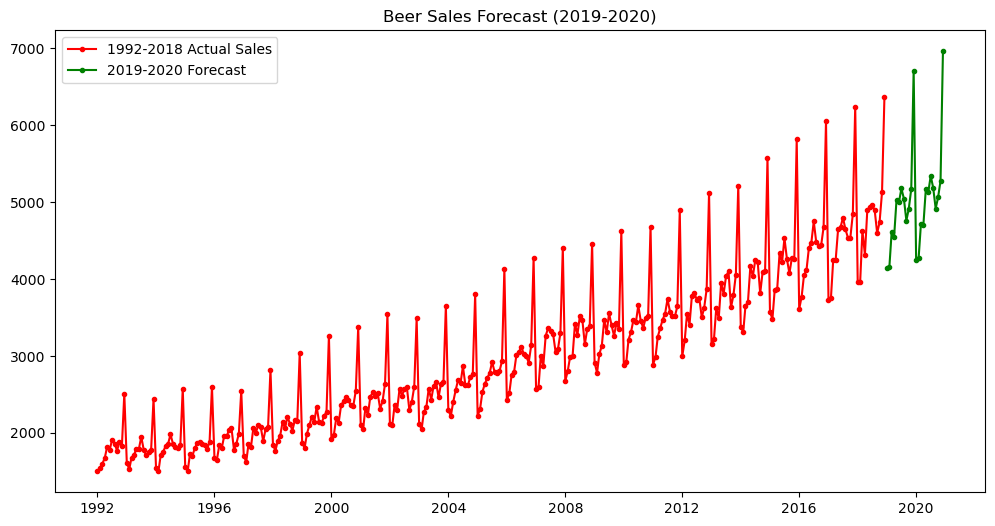

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df['beer'], color='red', label='1992-2018 Actual Sales', marker=".")
plt.plot(forecast, color='green', label='2019-2020 Forecast', marker=".")
plt.title("Beer Sales Forecast (2019-2020)")
plt.legend()
plt.show()

## Evaluating Forecasting Model 

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
# Get actual vs predicted values (train set)
train_size = int(len(df) * 0.8)  # 80% training, 20% testing
train, test = df_log[:train_size], df_log[train_size:]

In [19]:
# Train SARIMA model on training data
model = SARIMAX(train, order=(3,0,0), seasonal_order=(0,1,2,12))
results = model.fit()

In [20]:
# Make predictions on the test set
predictions_log = results.predict(start=len(train), end=len(df)-1)
predictions = np.exp(predictions_log)  # Convert back from log scale

### Evaluation metrics

- Mean Absolute Error

In [21]:
mae = mean_absolute_error(np.exp(test), predictions)
mae

151.38470411931297

- Mean Squared Error

In [22]:
mse = mean_squared_error(np.exp(test), predictions)
mse

34080.60961093484

- Root Mean Squared Error

In [23]:
rmse = np.sqrt(mse)
rmse

184.6093432384581

- Mean Absolute Percentage Error

In [24]:
mape = np.mean(np.abs((np.exp(test) - predictions) / np.exp(test))) * 100
mape

3.3822836004127956

In [25]:
acc_test = 100 - mape
acc_test

96.61771639958721

In [26]:
# Convert test set back from log scale
actual = np.exp(test)

- Plot actual vs predicted values

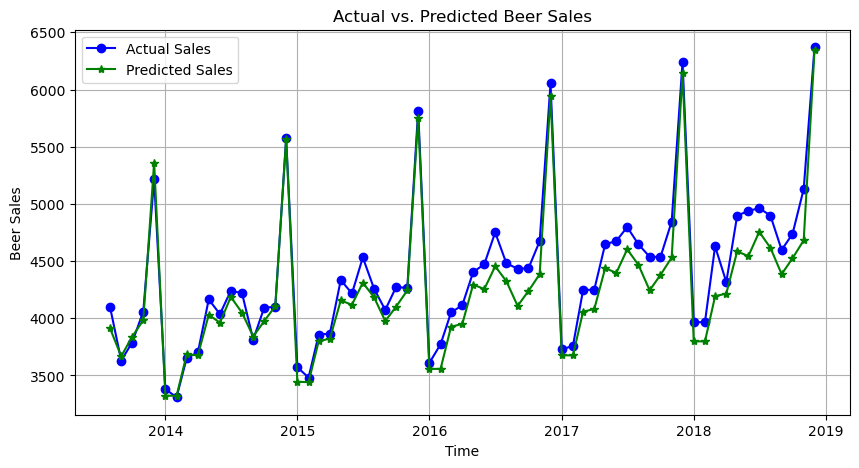

In [27]:
plt.figure(figsize=(10, 5))  
plt.plot(actual.index, actual, color='blue', marker="o", label='Actual Sales')  
plt.plot(actual.index, predictions, color='green', marker="*", label='Predicted Sales')
plt.title("Actual vs. Predicted Beer Sales")
plt.xlabel("Time")
plt.ylabel("Beer Sales")
plt.legend()
plt.grid()
plt.show()


## CONCLUSION 

- successfully developed a time-series forecasting model to predict beer sales for 2019-2020 using SARIMA.
- By analyzing historical trends and seasonality (1992-2018), the model achieved a 96.61% accuracy,with a low MAPE of 3.38%, ensuring reliable demand forecasting.